In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
train_cleaned = pd.read_csv("data/train-cleaned.csv")
test_cleaned = pd.read_csv("data/test-cleaned.csv")
train_augmented = pd.read_csv("data/train-augmented.csv")
test_augmented = pd.read_csv("data/test-augmented.csv")

In [3]:
train_cleaned.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,median_storey
0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,18,pasir ris drive,pasir ris,east region,209700.0,2
1,2014-10-01,punggol,5 room,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,27,punggol field,punggol,north-east region,402300.0,11
2,2020-09-01,sengkang,5 room,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,10,fernvale,sengkang,north-east region,351000.0,2
3,2000-10-01,clementi,3 room,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,22,clementi north,clementi,west region,151200.0,8
4,2013-01-01,bukit batok,3 room,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,23,bukit batok west,bukit batok,west region,318600.0,8


In [4]:
train_augmented.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,...,mean_age_m,std_age_f,std_age_m,pri_sch_dist,pri_sch,sec_sch_dist,sec_sch,mall_dist,mrt_name,mrt_dist
0,2001-08-01,pasir ris,4 room,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,...,36.167630,20.331631,19.999478,0.344087,Loyang Primary School,0.428301,Pasir Ris Crest Secondary School,1.033216,Pasir Ris,1.137522
1,2014-10-01,punggol,5 room,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,...,31.967676,20.103889,19.793305,0.160852,Edgefield Primary School,0.312383,Meridian Secondary School,0.806040,Cove,0.118373
2,2020-09-01,sengkang,5 room,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,...,34.164736,20.311337,19.947820,0.184906,Fernvale Primary School,0.558380,Pei Hwa Secondary School,0.452556,Fernvale,0.481153
3,2000-10-01,clementi,3 room,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,...,40.577282,21.625967,21.440329,0.304561,Pei Tong Primary School,0.619132,Clementi Town Secondary School,0.456499,Clementi,0.423320
4,2013-01-01,bukit batok,3 room,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,...,38.318241,20.497124,20.287059,0.233809,Princess Elizabeth Primary School,0.217911,Bukit Batok Secondary School,0.764172,Bukit Batok,0.774220


In [5]:
test_cleaned.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,median_storey
0,2004-01-01,bukit batok,4 room,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,26,bukit batok west,bukit batok,west region,5
1,2001-11-01,tampines,5 room,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,22,tampines east,tampines,east region,5
2,2002-07-01,jurong east,3 room,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,24,toh guan,jurong east,west region,2
3,2015-04-01,ang mo kio,3 room,180,ang mo kio avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,34,yio chu kang east,ang mo kio,north-east region,5
4,2004-04-01,clementi,5 room,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,30,clementi north,clementi,west region,2


In [6]:
test_augmented.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,...,mean_age_m,std_age_f,std_age_m,pri_sch_dist,pri_sch,sec_sch_dist,sec_sch,mall_dist,mrt_name,mrt_dist
0,2004-01-01,bukit batok,4 room,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,...,38.318241,20.497124,20.287059,0.467109,Princess Elizabeth Primary School,0.426327,Bukit Batok Secondary School,0.693942,Bukit Batok,0.667549
1,2001-11-01,tampines,5 room,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,...,37.653564,20.670669,20.366271,0.530017,East Spring Primary School,0.078892,East Spring Secondary School,1.933979,Simei,1.833500
2,2002-07-01,jurong east,3 room,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,...,39.442053,20.942785,20.636231,0.577345,Yuhua Primary School,0.401047,Shuqun Secondary School,0.524612,Jurong East,0.518257
3,2015-04-01,ang mo kio,3 room,180,ang mo kio avenue 5,82.0,new generation,uncategorized,1981,1.380084,...,41.114645,21.625228,21.358572,0.800015,Mayflower Primary School,0.571233,Anderson Secondary School,0.829128,Yio Chu Kang,0.546923
4,2004-04-01,clementi,5 room,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,...,40.577282,21.625967,21.440329,0.316899,Pei Tong Primary School,0.443189,"School of Science and Technology, Singapore",0.604664,Clementi,0.515878


In [7]:
cleaned = pd.concat([train_cleaned, test_cleaned], sort=False)
augmented = pd.concat([train_augmented, test_augmented], sort=False)

cleaned = cleaned.dropna()
augmented = augmented.dropna()

In [8]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431732 entries, 0 to 431731
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                431732 non-null  object 
 1   town                 431732 non-null  object 
 2   flat_type            431732 non-null  object 
 3   block                431732 non-null  object 
 4   street_name          431732 non-null  object 
 5   floor_area_sqm       431732 non-null  float64
 6   flat_model           431732 non-null  object 
 7   eco_category         431732 non-null  object 
 8   lease_commence_date  431732 non-null  int64  
 9   latitude             431732 non-null  float64
 10  longitude            431732 non-null  float64
 11  elevation            431732 non-null  int64  
 12  subzone              431732 non-null  object 
 13  planning_area        431732 non-null  object 
 14  region               431732 non-null  object 
 15  resale_price     

In [9]:
augmented.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431732 entries, 0 to 431731
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   month                      431732 non-null  object 
 1   town                       431732 non-null  object 
 2   flat_type                  431732 non-null  object 
 3   block                      431732 non-null  object 
 4   street_name                431732 non-null  object 
 5   floor_area_sqm             431732 non-null  float64
 6   flat_model                 431732 non-null  object 
 7   eco_category               431732 non-null  object 
 8   lease_commence_date        431732 non-null  int64  
 9   latitude                   431732 non-null  float64
 10  longitude                  431732 non-null  float64
 11  elevation                  431732 non-null  int64  
 12  subzone                    431732 non-null  object 
 13  planning_area              43

In [10]:
# prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
augmented['flat_type'].unique()
augmented['flat_model'].unique()

array(['model a', 'improved', 'premium apartment', 'new generation',
       'apartment', 'simplified', 'standard', 'adjoined flat',
       'multi generation', 'maisonette', 'model a2', 'model a maisonette',
       'dbss', 'improved maisonette', 'terrace', 'type s1', 'type s2',
       '2 room', 'premium apartment loft', 'premium maisonette'],
      dtype=object)

Types of Flat Models:

Standard: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974. 

Improved: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974. 

New Generation: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.

Model A: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm) 

Model A2: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm) 

Simplified: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm) 
Multi Generation: 3Gen flats designed to meet the needs of multi-generation families. 

Maisonette: AKA Model A Maisonette — 2 storeys HDB flat 
Premium Apartment: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes 

Executive Maisonette: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995 

Executive Apartment: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments. 

DBBS: public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos

Adjoined Flat: Large HDB flats which are combined from 2 HDB flats 

Terrace: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued 

Type S1S2: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively 

2-room: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area 

#### REFERENCE : https://www.teoalida.com/singapore/hdbflattypes/ 

In [11]:
augmented['town'].unique()

array(['pasir ris', 'punggol', 'sengkang', 'clementi', 'bukit batok',
       'jurong west', 'geylang', 'yishun', 'bukit panjang', 'serangoon',
       'jurong east', 'kallang/whampoa', 'hougang', 'woodlands',
       'tampines', 'choa chu kang', 'marine parade', 'toa payoh',
       'queenstown', 'bedok', 'bishan', 'ang mo kio', 'sembawang',
       'bukit merah', 'central area', 'bukit timah'], dtype=object)

### Distribution of HDB Floor Area

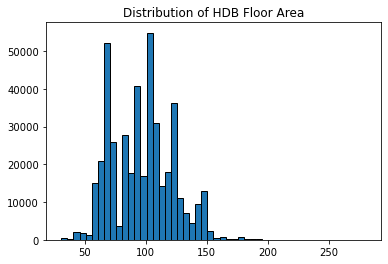

terrace               28
premium maisonette     6
maisonette             5
apartment              3
adjoined flat          1
Name: flat_model, dtype: int64

In [12]:
plt.hist(augmented['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
display(augmented[augmented['floor_area_sqm'] > 200]['flat_model'].value_counts())

Outliers in floor area are generally special HDBs that are larger than ordinary ones. As a result, from a multivariate standpoint, they may not be outliers.

### By Flat Type

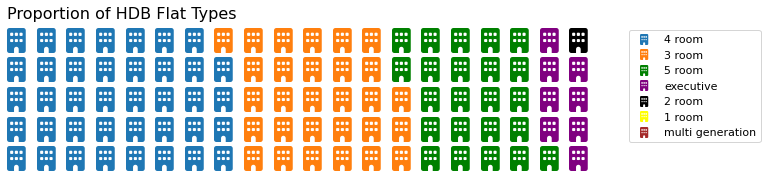

In [13]:
## Waffle chart for flat type - number of rooms
!pip install pywaffle
from pywaffle import  Waffle

flattype = dict(augmented['flat_type'].value_counts()/len(augmented)*100)
# flattype1519 = dict(augmented.set_index('month')['2018':'2020'].reset_index()['flat_type'].value_counts()/len(prices.set_index('month')['2018':'2020'].reset_index())*100)

plt.figure(figsize=(10,5),
    FigureClass=Waffle, 
    plots={
        '211': {
            'values': flattype,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':11},
            'title': {'label': 'Proportion of HDB Flat Types', 'loc': 'left', 'fontsize':16}
        },
    },
    rows=5, 
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    #colors=["#3c78d8", "#00cef6", "#aff000", '#28324a', 'black', 'yellow', 'brown'],
    icons='building', 
    font_size=25, 
    icon_legend=True)
    
plt.show()

#### The majority are of 4 rooms and there are not many 1 room, 2 room and multi generations flats 

In [15]:
flattype = ['3 room','4 room','5 room','executive']
augmented_n = augmented.set_index('month').sort_index().loc['2015-01':'2020-12']
augmented_n = augmented_n[augmented_n['flat_type'].isin(flattype)][['flat_type','resale_price']].reset_index()
augmented_n['flat_type_year'] = augmented_n['flat_type'] + ' - ' + augmented_n['month'].apply(lambda x: str(x)[:4])
augmented_n

,month,flat_type,resale_price,flat_type_year
0,2015-01-01,5 room,479700.0,5 room - 2015
1,2015-01-01,3 room,252000.0,3 room - 2015
2,2015-01-01,5 room,562500.0,5 room - 2015
3,2015-01-01,4 room,316800.0,4 room - 2015
4,2015-01-01,4 room,291499.2,4 room - 2015
...,...,...,...,...
96095,2020-11-01,4 room,409500.0,4 room - 2020
96096,2020-11-01,3 room,288000.0,3 room - 2020
96097,2020-11-01,5 room,396000.0,5 room - 2020
96098,2020-11-01,4 room,391500.0,4 room - 2020


<ipython-input-16-56a79b18a6c1>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


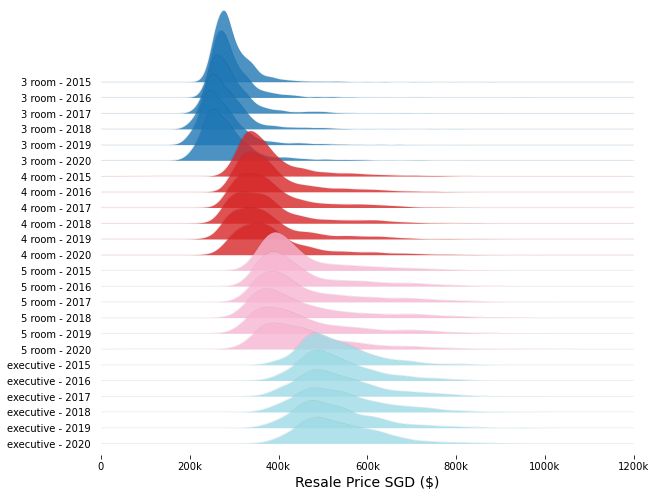

In [16]:
!pip install joypy
import joypy
fig, axes = joypy.joyplot(augmented_n, by="flat_type_year", column="resale_price",figsize=(9,7),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

#### It seems like the resale prices has not changed much within the each flat type but the only difference is that the price increases with the number of rooms

### By town

In [17]:
#The median commencement date of the flats for each town
augmented['year'] = pd.DatetimeIndex(augmented['month']).year
# augmented.set_index('month').sort_index().loc['2015-01':'2020-12']
augmented[augmented['year'].isin([2019,2020])].groupby('town')['lease_commence_date'].median().sort_values()


town
marine parade      1975.0
ang mo kio         1980.0
bedok              1980.0
clementi           1980.0
toa payoh          1981.0
kallang/whampoa    1981.0
geylang            1982.0
jurong east        1984.0
central area       1984.0
bukit merah        1985.0
serangoon          1986.0
bukit batok        1986.0
yishun             1988.0
bukit timah        1988.0
bishan             1988.0
tampines           1988.0
hougang            1990.0
pasir ris          1993.0
queenstown         1995.5
jurong west        1997.0
woodlands          1998.0
choa chu kang      1998.0
sembawang          2001.0
bukit panjang      2002.0
sengkang           2012.0
punggol            2014.0
Name: lease_commence_date, dtype: float64

### By floor area

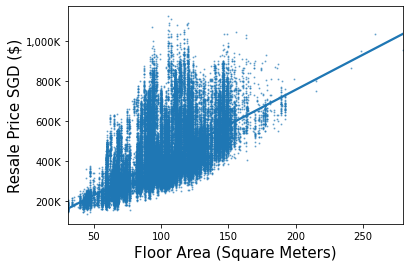

In [19]:
area = augmented[augmented['year'].isin([2015,2016,2017,2018,2019,2020])]
p=sns.regplot(x='floor_area_sqm', y='resale_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

### By Flat Model

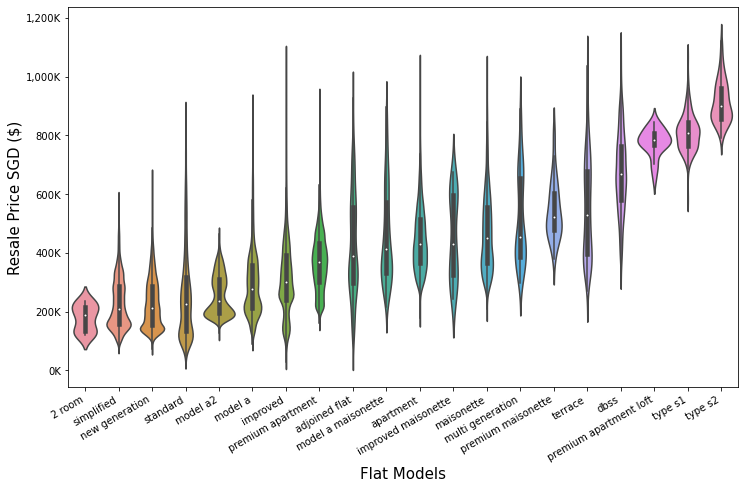

In [22]:
fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='resale_price', data=augmented, width=1,
                order=augmented.groupby('flat_model')['resale_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

### By Lease commence date

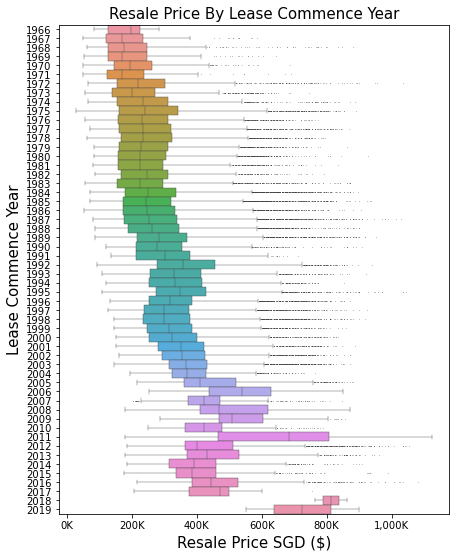

In [23]:
fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='resale_price', data=augmented, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()


### Distances from Amenities

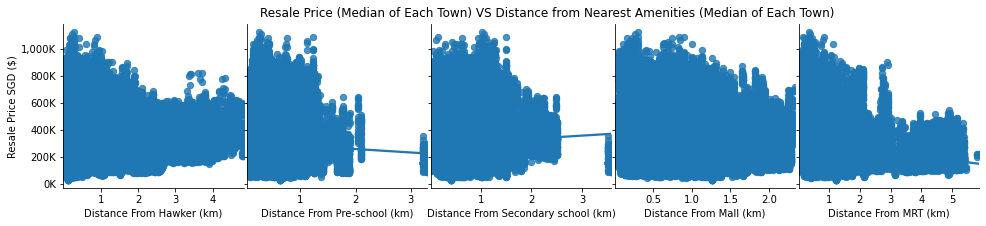

In [27]:
p=sns.pairplot(augmented, x_vars=["distance_to_market_hawker", "pri_sch_dist", "sec_sch_dist", "mall_dist", "mrt_dist"], y_vars=["resale_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From Hawker (km)', size=10), axes[0,1].set_xlabel('Distance From Pre-school (km)', size=10)
axes[0,2].set_xlabel('Distance From Secondary school (km)', size=10), axes[0,3].set_xlabel('Distance From Mall (km)', size=10)
axes[0,4].set_xlabel('Distance From MRT (km)', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest Amenities (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

### Correlation heatmap

<ipython-input-28-b0e3931ccd36>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


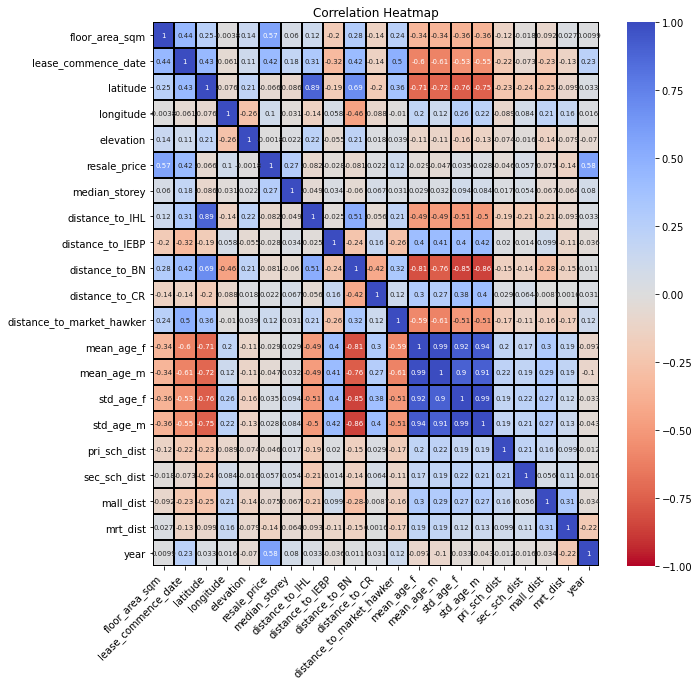

In [28]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(augmented.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

<ipython-input-29-63eb38dee6e3>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


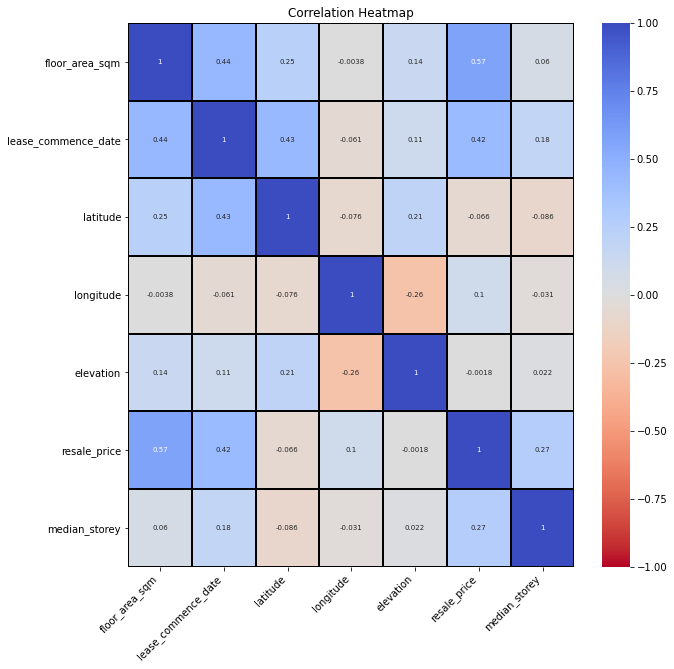

In [29]:
# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cleaned.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()